# Compare a single feature

## Exploration of a single ICU sepsis data log

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Add extra plotting options (mpld3)
# import mpld3
# mpld3.enable_notebook()

In [2]:
# Provide the path
path = '../training/'

In [3]:
# Choose patient sample
sample_num = 200

In [4]:
# Import (and print) dataframe layout
def loadICUdata(sample_num, path = './', printdf = False):
    samplestr = 'p' + (str(sample_num) + '.psv').rjust(9, '0')
    fname = path + samplestr
    df = pd.read_csv(fname, sep = '|')
    if printdf:
        print(fname, ' file:')
        print(df)
    return df

In [5]:
# Single sample
df = loadICUdata(sample_num, path, False)

In [6]:
#df

## Load all DATA

In [7]:
# Load all patients' DATA
npatients = 5000
DATA = []  # DATA structure
for i in range(1,npatients+1):
    df = loadICUdata(i, path, False)
    DATA.append(df) 

## Feature-based comparison

In [8]:
# Define feature labels
feature_labels = DATA[0].keys()
feature_labels

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [9]:
# Function get my_feat_matrix values
def get_featurematrix(dflist, featurename, nanremove = True):
    for i in range(len(dflist)):
        # Initialise to -1
        if i == 0:
            maxdim = max(map(len, dflist))
            my_feat_matrix = -1 * np.ones((len(dflist), maxdim),dtype=np.double)
        count = len(dflist[i])   
        if nanremove:
            my_feat_matrix[i,:count] = np.nan_to_num(dflist[i][featurename].values)
        else:
            my_feat_matrix[i,:count] = (dflist[i][featurename].values)
    return my_feat_matrix

In [10]:
# Choose a feature
my_feat = feature_labels[0]
my_feat

'HR'

In [11]:
my_feat_matrix = get_featurematrix(DATA, my_feat)
my_feat_matrix

array([[   0. ,   93. ,   91. , ...,   -1. ,   -1. ,   -1. ],
       [   0. ,   56.5,   61. , ...,   -1. ,   -1. ,   -1. ],
       [   0. ,  130. ,  120. , ...,   -1. ,   -1. ,   -1. ],
       ..., 
       [   0. ,   83. ,   83. , ...,   -1. ,   -1. ,   -1. ],
       [   0. ,   90. ,   90. , ...,   -1. ,   -1. ,   -1. ],
       [   0. ,  107.5,  101. , ...,   -1. ,   -1. ,   -1. ]])

## Plot

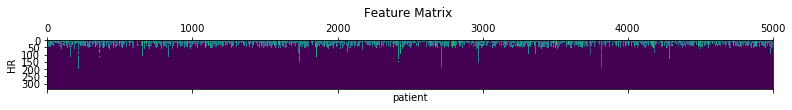

In [12]:
# Plot matrix using fig size
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow(np.transpose(my_feat_matrix))
ax.set_title("Feature Matrix \n",loc='center')
ax.set_xlabel('patient')
ax.set_ylabel(str(my_feat))

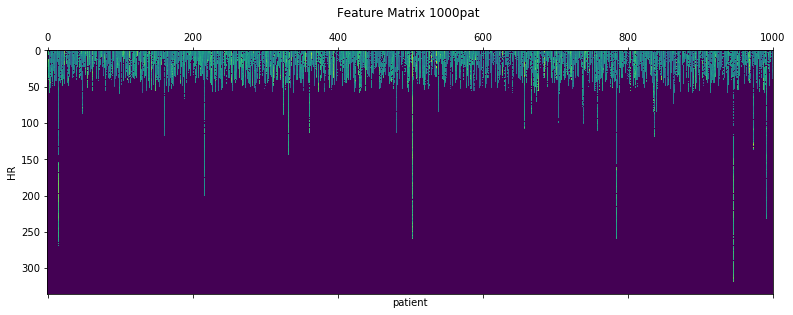

In [13]:
# Explore the first npat patients
npat = 1000
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow(np.transpose(my_feat_matrix[:npat,:]))
ax.set_title("Feature Matrix " + str(npat) + "pat \n",loc='center')
ax.set_xlabel('patient')
ax.set_ylabel(str(my_feat))
